# Data Integration and Feature Engineering

# Data Integration

Data integration is a set of processes used to retrieve and combine data from disparate sources into meaningful and valuable information. A complete data integration solution delivers trusted data from a variety of sources. Analytics methodologies can then be applied to the integrated data, to produce meaningful insights. 


In Pandas there are different functions that can help us do that easily which are

*   `pd.merge()`,for combining data on common columns or indices.
*   `DataFrame.join()`,  for combining data on a key column or an index
*   `pd.concat()`,for combining DataFrames across rows or columns

In this exercise, we'll merge the details of students from two datasets, namely `student.csv` and `marks.csv`. The student dataset contains columns such as *Age*, *Gender*, *Grade*, and *Employed*. The `marks.csv` dataset contains columns such as *Mark* and *City*. The *Student_id* column is common between the two datasets.

The `student.csv` dataset:  https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/student.csv

The `marks.csv` dataset:  https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/mark.csv
 

Let's first inspect our datasets.

In [4]:
import pandas as pd
import numpy as np
students_df = pd.read_csv('./data/student.csv')
marks_df = pd.read_csv('./data/mark.csv')
display(students_df, marks_df)


,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no
...,...,...,...,...,...
227,228,21,Female,1st Class,no
228,229,20,Male,2nd Class,no
229,230,20,Male,3rd Class,yes
230,231,19,Female,1st Class,yes


,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi
...,...,...,...
227,228,99,Pune
228,229,70,Chennai
229,230,55,Delhi
230,231,97,Mumbai


To integrate the above 2 datasets into 1 based on the student ID, you may use the `merge` function, and pass the dataframes you would like to integrate

In [5]:
students_marks_df = pd.merge(students_df, marks_df) 
#  on='Student_id' optional parameter if you'd like to specify what you are merging on
students_marks_df

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
...,...,...,...,...,...,...,...
227,228,21,Female,1st Class,no,99,Pune
228,229,20,Male,2nd Class,no,70,Chennai
229,230,20,Male,3rd Class,yes,55,Delhi
230,231,19,Female,1st Class,yes,97,Mumbai


In [6]:
students_df['Mark']=students_df.Grade.str.extract('(\d+)')
students_df.Mark = students_df.Mark.astype(int)
display(students_df, marks_df)
students_marks_df = pd.merge(students_df, marks_df) 
#  on='Student_id' optional parameter if you'd like to specify what you are merging on
students_marks_df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Erica\AppData\Local\Temp\ipykernel_31224\3550929850.py:1: SyntaxWarning: invalid escape sequence '\d'
  students_df['Mark']=students_df.Grade.str.extract('(\d+)')


,Student_id,Age,Gender,Grade,Employed,Mark
0,1,19,Male,1st Class,yes,1
1,2,20,Female,2nd Class,no,2
2,3,18,Male,1st Class,no,1
3,4,21,Female,2nd Class,no,2
4,5,19,Male,1st Class,no,1
...,...,...,...,...,...,...
227,228,21,Female,1st Class,no,1
228,229,20,Male,2nd Class,no,2
229,230,20,Male,3rd Class,yes,3
230,231,19,Female,1st Class,yes,1


,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi
...,...,...,...
227,228,99,Pune
228,229,70,Chennai
229,230,55,Delhi
230,231,97,Mumbai


,Student_id,Age,Gender,Grade,Employed,Mark,City


The `pd.merge()` function recognizes that each DataFrame has an *Student_id* column, and automatically joins using this column as a key. The result of the merge is a new DataFrame that combines the information from the two inputs.

Even though, this dataset has ordered entries in both datasets, it is not necessairly that the order of entries in each column should be maintained: in this case, if the order of the *Student_id* column differs between df_students and df_marks, and the `pd.merge()` function would have correctly accounted for this.

Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index (see the left_index and right_index keywords, discussed momentarily).

Now that we get an essence of how `pd.merge()` works. Let's dive in into the different types of joins in `pd.merge()`.

## pd.merge() Relationship Types

The `pd.merge()` function implements a number of types of integrations: the *one-to-one*, *many-to-one*, and *many-to-many*.
All three types are accessed via an identical call to the `pd.merge()` interface; the type of integration performed depends on the form of the input data.
Here we will show simple examples of the three types of merges, and discuss detailed options further below.

### One-to-one Integration

Perhaps the simplest type of merge expresion is the one-to-one integration, which is in many ways very similar to the column-wise concatenation.

As a concrete example, consider the following two `DataFrames` which contain information on several employees in a company:

In [7]:
employees_df = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
employees_hire_date_df = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(employees_df, employees_hire_date_df)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


Remeber `pd.concat` is so similar to pd.merge one-to-one integrations. However, the order should be be maintained in both dataframes that are to be merged. Therefore, you will find that the below concat doesn't really do what we intended to do.

In [8]:
pd.concat([employees_df, employees_hire_date_df], axis=1)

,employee,group,employee,hire_date
0,Bob,Accounting,Lisa,2004
1,Jake,Engineering,Bob,2008
2,Lisa,Engineering,Jake,2012
3,Sue,HR,Sue,2014


Hence, we will go with `pd.merge()` to merge the above datasets.

In [9]:
employees_one_to_one_df = pd.merge(employees_df, employees_hire_date_df)
employees_one_to_one_df

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Many-to-one Integration
Many-to-one integrations are integrations in which one of the two key columns contains duplicate entries. For the many-to-one case, the resulting DataFrame will preserve those duplicate entries as appropriate. Consider the following example of a many-to-one integration where we assign a supervisor to each employee based on *group*:

In [10]:
department_manager_df = pd.DataFrame({'manager': ['Guido', 'Carly', 'Steve'],
                    'group': ['Accounting', 'Engineering', 'HR']})
display(employees_df, department_manager_df)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,manager,group
0,Guido,Accounting
1,Carly,Engineering
2,Steve,HR


In [11]:
one_to_many_df = pd.merge(employees_df, department_manager_df)
one_to_many_df

,employee,group,manager
0,Bob,Accounting,Guido
1,Jake,Engineering,Carly
2,Lisa,Engineering,Carly
3,Sue,HR,Steve


Note that the resulting dataset added a supervisor to each employee based on group. Therefore, we can find replicas of the same supervisor within the rows.

### Many-to-many Integration
Many-to-many integrations are a bit confusing conceptually, but are nevertheless well defined. If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge. This will be perhaps most clear with a concrete example. Consider the following, where we have a DataFrame showing one or more skills associated with a particular group. By performing a many-to-many integration, we can recover the skills associated with any individual person:

In [12]:
required_group_skills_df = pd.DataFrame({'group': ['Accounting','Accounting', 'Engineering', 'Engineering', 'HR'],
                                         'skills':['math', 'spreadsheets', 'coding', 'problem solving',
                                                   'communication']})
display(employees_df, required_group_skills_df)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,problem solving
4,HR,communication


In [13]:
many_to_many_df = pd.merge(employees_df, required_group_skills_df)
many_to_many_df

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,problem solving
4,Lisa,Engineering,coding
5,Lisa,Engineering,problem solving
6,Sue,HR,communication


As you might have noticed, for each employee of a certain group, the skills of that group is added.

## pd.merge() arguments
The are several arguments in the merge function that are of a good use. Let's start by looking at the easiest of them.

The `on` argument

The `on` argument allows us to explicitly type the name(s) of the column we would like to integrate on.

In [14]:
employees1_df = pd.DataFrame({'first_name': ['Bob', 'Jake', 'Lisa', 'Lisa'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR'],
                    'last_name': ['Mark', 'Wilson', 'George', 'Adam']})
employees_hire_date_df = pd.DataFrame({'first_name': ['Lisa', 'Bob', 'Jake', 'Lisa'],
                                        'last_name': ['George', 'Mark', 'Wilson', 'Adam'],
                    'dates': [2004, 2008, 2012, 2014]})
display(employees_df.head(5), employees_hire_date_df.head(5))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,first_name,last_name,dates
0,Lisa,George,2004
1,Bob,Mark,2008
2,Jake,Wilson,2012
3,Lisa,Adam,2014


In [15]:
pd.merge(employees1_df, employees_hire_date_df, on=['first_name', 'last_name'])

,first_name,group,last_name,dates
0,Bob,Accounting,Mark,2008
1,Jake,Engineering,Wilson,2012
2,Lisa,Engineering,George,2004
3,Lisa,HR,Adam,2014


### The `left_on` and `right_on` arguments

At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as *name* rather than *employee*. In this case, we can use the left_on and right_on keywords to specify the two column names:

In [16]:
salaries_df = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [55, 60, 45, 70]})
display(salaries_df, employees_df)

,name,salary
0,Bob,55
1,Jake,60
2,Lisa,45
3,Sue,70


,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [17]:
pd.merge(employees_df, salaries_df, left_on='employee', right_on='name')

,employee,group,name,salary
0,Bob,Accounting,Bob,55
1,Jake,Engineering,Jake,60
2,Lisa,Engineering,Lisa,45
3,Sue,HR,Sue,70


Notice that the employee and name columns are both existent in the new dataframe. Therefore, as part of cleaning we have to drop one and keep the other.

### Indicies Merge
What if we want to merge based on indicies rather than column names? We first need to make sure that there are relevant indicies to integrate on. Let's start by creating an indicies for the `df_employees` and `df_names_and_salaries` dataframes. Next we'll merging them together using the `left_index` and `right_index` arguments.

In [18]:
employees_df_indexed = employees_df.set_index('employee')
salaries_df_indexed = salaries_df.set_index('name')
display(employees_df_indexed, salaries_df_indexed)

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,salary
name,
Bob,55
Jake,60
Lisa,45
Sue,70


In [19]:
pd.merge(employees_df_indexed, salaries_df_indexed, left_index=True, right_index=True)

,group,salary
employee,,
Bob,Accounting,55
Jake,Engineering,60
Lisa,Engineering,45
Sue,HR,70


Alternatively, you may use the `join` function to integrate the dataframes based on index.

In [20]:
employees_df_indexed.join(salaries_df_indexed)

,group,salary
employee,,
Bob,Accounting,55
Jake,Engineering,60
Lisa,Engineering,45
Sue,HR,70


## pd.merge() Join Types

As you might have studied, there are different types of joins between tables. Those are: inner, outer, left, and right.

By default, the `pd.merge` does an inner join. Therefore, in the column we are joining based on, only the values that is common in the dataframes we are merging based on are kept, and the rest are not merged.



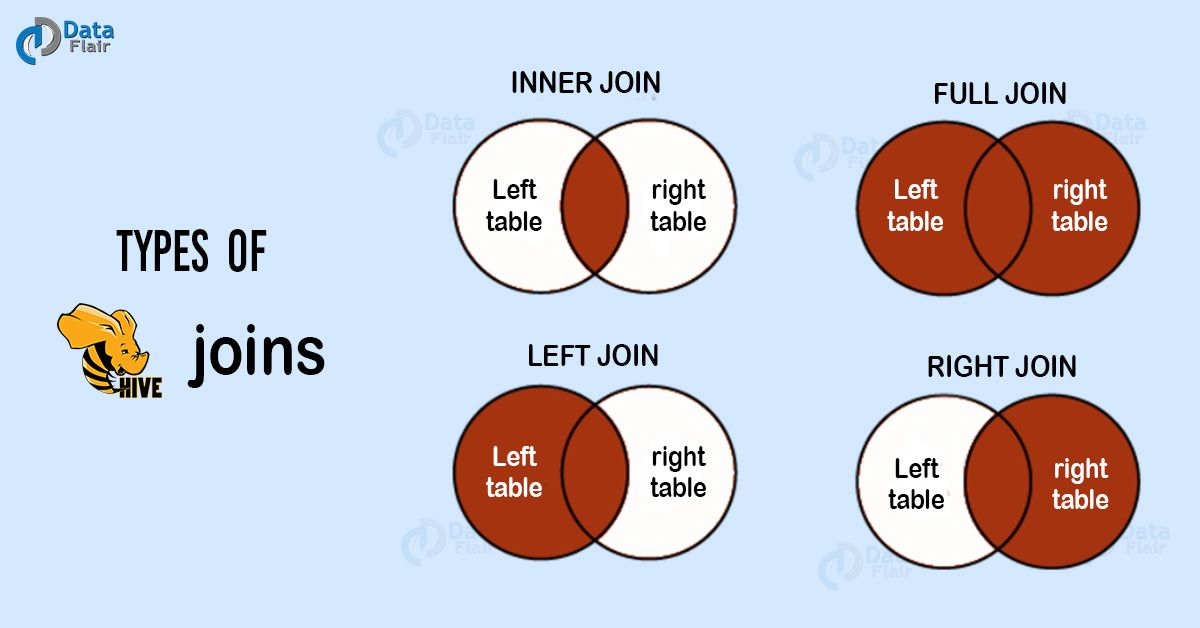

To specify the type of join we use the `how` argument inside the pd.merge. This argument can be set to 4 values: 



1.  *left*: use only keys from left frame, similar to a SQL left outer join; preserve key order.
2.  *right*: use only keys from right frame, similar to a SQL right outer join; preserve key order.
3. *outer*: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
4. *inner*: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.


Let's take a look at an example for each.:

### Inner Join

In [21]:
df1 = pd.DataFrame({'name':['Peter', 'Paul', 'Mary'],
                    'food':['fish', 'beans', 'bread']})
df2 = pd.DataFrame({'name':['Mary', 'Joseph', 'Carl'],
                    'drink':['wine', 'beer', 'coke']})
display(df1, df2)

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer
2,Carl,coke


In [22]:
pd.merge(df1, df2, how='inner')

,name,food,drink
0,Mary,bread,wine


Here we have merged two datasets that have only a single *name* entry in common: Bob. By default, the result contains the intersection of the two sets of inputs; this is what is known as an inner join. We can specify this explicitly using the how keyword, which defaults to *inner*:

### Outer Join

In [23]:
pd.merge(df1, df2, how='outer')

,name,food,drink
0,Carl,NaN,coke
1,Joseph,NaN,beer
2,Mary,bread,wine
3,Paul,beans,NaN
4,Peter,fish,NaN


Notice how the values that aren't common in both are filled with NaNs

### Left and Right Joins


The left join and right join return joins over the left entries and right entries, respectively. For example:

In [24]:
pd.merge(df1, df2, how='left')# same as: pd.merge(df2, df1, how='right')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [25]:
pd.merge(df1, df2, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer
2,Carl,NaN,coke


## Removing Attribute Redundancies

Feature selection is also known as attribute selection is a process of extracting the most relevant features from the dataset and then applying machine learning algorithms for the better performance of the model. A large number of irrelevant features increases the training time exponentially and increase the risk of overfitting.

There are two ways to remove unnecessary features that won't contribute to the model.

1.   Chi Square - For categorical features
2.   Covariance - For numeric features




### Removing Attribute Redundancies -  Chi-square Test for Feature Extraction:
Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with best Chi-square scores. It determines if the association between two categorical variables of the sample would reflect their real association in the population. 




Let's state the Chi-square hypotheses:

<b>Null hypothesis:</b> There is no statistically significant relationship between feature A and feature B.

<b>Alternative hypothesis:</b> There is a statistically significant relationship between the feature A and feature B.

Now there is something that we call the significance value or alpha. If the p-value of the features we are checking their chi-square score is less than the significance value, we can safely reject the null hypothesis (reject that the 2 features are independent).

The significance value (alpha) is the probability of rejecting the null hypothesis. Let's assume for the rest of this notebook that the alpha = 0.05. 

In python there is a function called `chi2_contengency()` that is avaliable in Scipy. The `chi2_contengency()` method is applied to a two dimensional array representing the actual attribute values, and it automatically computes the contingency matrix. Which returns:

1. chi2: The test statistic
2. p: The p-value of the test
3. dof: Degrees of freedom
4. expected: The expected frequencies, based on the marginal sums of the table

Let's start by taking a look at the data we have and then building the contengency matrix.

To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies. We will use the crosstab command from pandas.

In [26]:
from scipy.stats import chi2_contingency
df3 = pd.DataFrame({'Gender':['M','M','M','F', 'F']*10, 
                   'isSmoker':['Smoker', 'Smoker', 'NonSmoker', 'NonSmoker', 'Smoker']*10 })
df3.head(5)

,Gender,isSmoker
0,M,Smoker
1,M,Smoker
2,M,NonSmoker
3,F,NonSmoker
4,F,Smoker


Now that we have built the contingency table we can pass it to `chi2_contingency` function

In [27]:
contingecy = pd.crosstab(df3.Gender, df3.isSmoker)
contingecy

isSmoker,NonSmoker,Smoker
Gender,,
F,10,10
M,10,20


Compare p_value with your statistical threshold, we are going to use 0.05.

In [28]:
chi2, p, dof, expected= chi2_contingency(contingecy)
print(chi2, p, dof, expected)

0.78125 0.3767591178115821 1 [[ 8. 12.]
 [12. 18.]]


In [29]:
threshold = 0.05
if p<0.05:
    print("Null hypothesis rejected, attributes share statistical relationship")
else:
    print("Null hypothesis accepted, attributes don't have any statistical relationship")

Null hypothesis accepted, attributes don't have any statistical relationship


### Removing Attribute Redundancies - Pearson Test



The strength of the association between two **numeric** variables is known as correlation test.
For instance, if we are interested to know whether there is a relationship between the mpg of a car and its weight, a correlation coefficient can be calculated to answer this question.

In [30]:
cars_df = pd.read_csv('./data/Auto.csv')
cars_df.head(5)

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


Next, we need to convert each column to a series and pass them to the `pearsonr` function provided by SciPy

In [31]:
# cars_df.corr()['weight']['mpg']

# Specifying what you are correlating (specially lists not DFs)
from scipy.stats import pearsonr
corr, _ = pearsonr(cars_df.weight, cars_df.mpg)
print(corr)

-0.8782814536196802


A high absolute Pearson correlation (close to 1 or -1) suggests two attributes are strongly linearly related. In such a case, one attribute can often be removed without losing too much information, as they provide similar predictive power.

Deciding which attribute to remove depends on domain knowledge and the specific problem, sometimes you may wish to keep the attribute that is more relevant to your analysis.

<Axes: xlabel='weight', ylabel='mpg'>

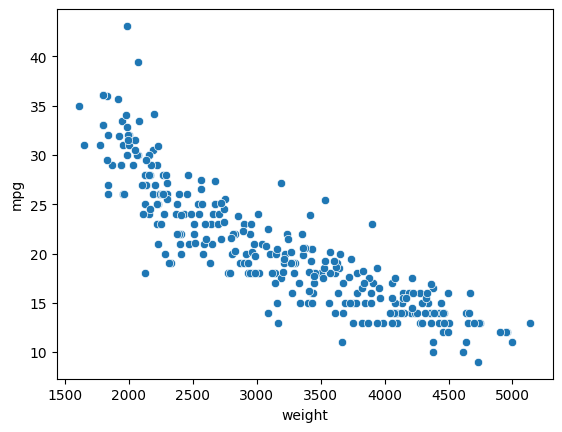

In [32]:
import seaborn as sns
sns.scatterplot(y=cars_df.mpg, x=cars_df.weight)

In [33]:
cars_df_modified = cars_df.drop(columns=['weight'])
cars_df_modified.head(5)

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Run everything in the notebooks, understand joins, understand Pearson and chi-square, study these two notebooks and understand the concepts for the next week's assignment